# Pattern recognize Design 32183492 이정원

## 코드 소개

#### (1) sklearn에서 제공하는 dataset중 wine data를 불러온다
#### (2) 의사결정트리 알고리즘 DecisionTreeClassifier를 불러온다.
#### (3) dataset을 학습데이터와 검증데이터로 구분해주는 train_test_split을 불러온다.
#### (4), (5) 데이터처리를 도와줄 pandas와 배열을 위한 numpy를 불러온다.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### sklearn에 저장된 dataset중 하나인 wine 데이터 불러오기

In [ ]:
wine = load_wine()

#### sklearn의 dataset인 Wine data 소개

In [ ]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- wine data를 확인하기 위해 보기편한 데이터 프레임으로 보여준다.
- wine data가 저장된 csv파일을 읽어온다.
- Wine 열이 Class Distribution: class_0 (59), class_1 (71), class_2 (48)으로 표현된 값이다.

In [ ]:
df = pd.read_csv('wine.csv')

In [ ]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


#### 다른 방법으로 데이터 프레임으로 표현
- 행은 target을 / 열은 feature를 나타낸다.

In [ ]:
df_wine = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


- wine data를 불러온다. (feature)

In [ ]:
wine_data = wine.data

- wine target을 불러온다. (target)

In [ ]:
wine_target = wine.target

#### 학습데이터의 클래스 분포 현황

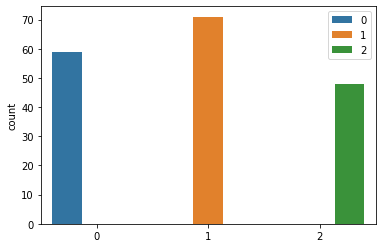

In [ ]:
import seaborn as sns
sns.countplot(x=wine_target, data=df, hue=wine_target);

#### 2차원 그래프 형태로 보여주기 위해 레이블을 어떤 것으로 택할지 wine의 feature를 찾는다.

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

#### 2차원 그래프 형태로 시각화 하기 위하여 matplotlib를 불러온다.
- feature label은 magnesium, color_intensity로 했다.

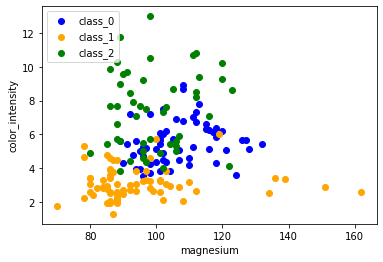

In [ ]:
import matplotlib.pyplot as plt

features = 'magnesium', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'orange', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]],
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left') #범례를 표시해준다. (class_0/ class_1/ class_2)
plt.show()

#### feature를 다른 것으로 바꾸어서 그래프를 나타내본다.

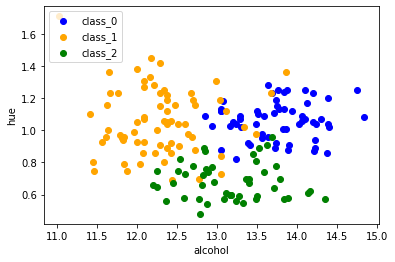

In [ ]:
import matplotlib.pyplot as plt

features = 'alcohol', 'hue'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'orange', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]],
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left') #범례를 표시해준다. (class_0/ class_1/ class_2)
plt.show()

#### 학습데이터와 검증데이터를 분리한다.
- wine_data는 feature/ wine_target은 target 데이터를 나타낸다.
- test_size가 0.2 라는 것은 20%는 검증데이터, 80%는 학습데이터로 사용하겠다는 의미이다.

In [ ]:
x_training, x_test, y_training, y_test = train_test_split(wine_data, wine_target, test_size=0.2)

#### DecisionTreeClassfier 객체를 생성한다.
- 생성된 객체를 위에서 입력한 학습데이터 feature와 target데이터를 이용해서 학습시킨다.

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_training, y_training)

DecisionTreeClassifier()

#### 학습이 완료되고 예측을 수행한다. 예측은 검증데이터 x_test를 이용한다.

In [ ]:
predict = dtc.predict(x_test)

#### 학습데이터 값

In [ ]:
y_test

array([2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2])

#### 예측값을 살펴보면 클래스가 0,1,2로 나누어져서 예측되고 있는 모습이 관찰된다.
- 학습데이터와 비슷한 값과 다른 값이 보인다.

In [ ]:
predict

array([2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2])

#### 예측 성능을 평가하기 위해 사이킷런에서 제공하는 정확도 측정 함수를 사용한다.
- 파라미터로 y_test는 실제 데이터(학습 데이터) predict는 예측 데이터를 입력한다.
- 정확도는 학습을 새로 수행할 때마다 달라진다.

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict))

0.9444444444444444
